In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import os
import boto3
import rasterio
import rioxarray
import xarray as xr
import numpy as np
from rasterio.mask import mask
from shapely.geometry import mapping
from datetime import datetime
import requests

In [9]:
# Define the base directory dynamically
base_dir = (".")

# Dictionary mapping shapefile paths to country names
gdf_dict = {
    "ethiopia": os.path.join(base_dir, "geo3_et2007", "geo3_et2007.shp"),
    "senegal": os.path.join(base_dir, "geo3_sn2013", "geo3_sn2013.shp"),
    "mali": os.path.join(base_dir, "geo3_ml2009", "geo3_ml2009.shp")
}



Found: .\geo3_et2007\geo3_et2007.shp
Found: .\geo3_sn2013\geo3_sn2013.shp
Found: .\geo3_ml2009\geo3_ml2009.shp


C:\Users\aadit\AppData\Local\Temp\ipykernel_21324\1148935800.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(gdf_dict.keys(), loc='upper right')


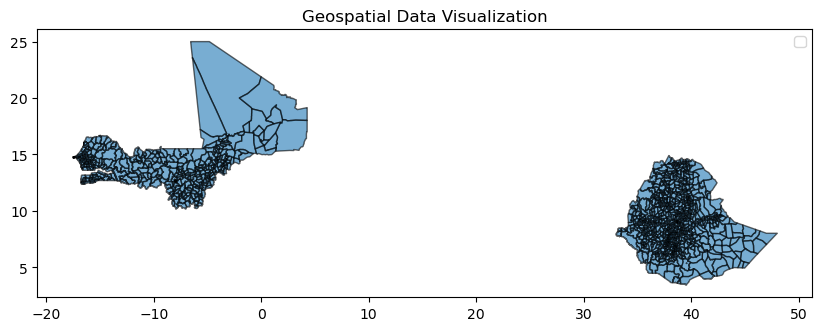

In [10]:
for country, shp in gdf_dict.items():
    if os.path.exists(shp):
        print(f"Found: {shp}")
        try:
            gdf_dict[country] = gpd.read_file(shp)
        except Exception as e:
            print(f"Error loading {shp}: {e}")
    else:
        print(f"Missing: {shp}")

if not gdf_dict:
    print("No shapefiles found. Ensure the script is running in the correct directory.")
else:
    # Plot each shapefile
    fig, ax = plt.subplots(figsize=(10, 8))
    legend_handles = []
    for country, gdf in gdf_dict.items():
        plot = gdf.plot(ax=ax, alpha=0.6, edgecolor='black', label=country)
        legend_handles.append(plot)
    
    ax.set_title("Geospatial Data Visualization")
    ax.legend(gdf_dict.keys(), loc='upper right')
    plt.show()


['Tahtay Adiabo, Shiraro Town', 'Laelay Adiabo', 'Medebay Zana', 'Tahtay Koraro', 'Asegede Tsimbila', 'Tselemti', 'Shere Endasilasie Town', 'Mereb Lehe', 'Ahiferom', 'Were Lehe', 'Adwa', 'Laelay Maychew', 'Tahtay Maychew', 'Nader Adet', 'Kola Temben, Abi Adi Town', 'Degua Temben', 'Tanqua Abergele', 'Adwa Town', 'Axum Town', 'Gulo Meheda', 'Erob', 'Saesi Tsadamba', 'Ganta Afeshum', 'Hawzen', 'Kilte Awlalo', 'Atsbi Wonberta', 'Adigrat Town', 'Wukro Town', 'Seharti Samre', 'Enderta', 'Hintalo Wajirat', 'Alage', 'Endamehoni', 'Raya Azebo', 'Alamata', 'Ofla, Korem Town', 'Maychew Town', 'Alamata Town', 'Kafta Humera, Humera Town', 'Welkayit', 'Tsegede', 'Debub', 'Semen', 'Dubti', 'Elidar', 'Asayita', 'Afambo', 'Mile', 'Chifra', 'Kori', 'Arebti', 'Qunoba', 'Abala', 'Megale', 'Berhile', 'Dalol', 'Afdera', 'Amibara', 'Awash Fentale', 'Gewane', 'Dulacha', 'Bure Mudayitu', 'Argoba Liyu', 'Awra', 'Ewa', 'Teru', 'Yalo', 'Golina', 'Telalak', 'Semurobi', 'Dewe', 'Dali Fage', 'Hadele Ele', 'Adi Arka

C:\Users\aadit\AppData\Local\Temp\ipykernel_21324\3018606761.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


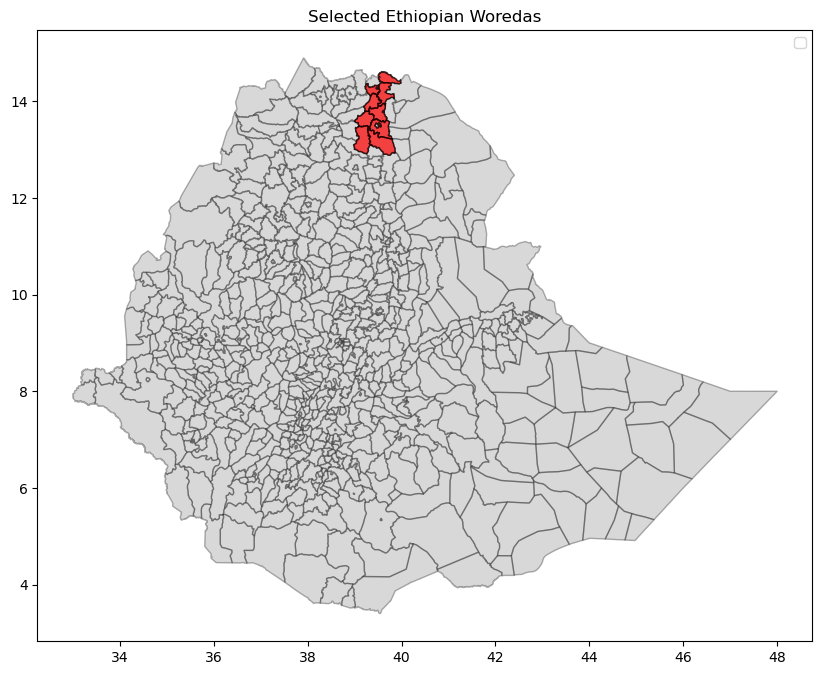

In [11]:
print(gdf_dict['ethiopia']['ADMIN_NAME'].tolist())
ethiopia_gdf = gdf_dict.get("ethiopia")  # Get the Ethiopia GeoDataFrame
selected_woredas = ["Hawzen", "Saesi Tsadamba", "Hintalo Wajirat","Degua Temben", "Erob","Ganta Afeshum","Seharti Samre","Enderta","Kilte Awlalo"]
eth_gdf = ethiopia_gdf[ethiopia_gdf["ADMIN_NAME"].isin(selected_woredas)]        
        # Plot filtered woredas
fig, ax = plt.subplots(figsize=(10, 8))
ethiopia_gdf.plot(ax=ax, alpha=0.3, edgecolor='black', color='gray', label="All Woredas")
eth_gdf.plot(ax=ax, alpha=0.7, edgecolor='black', color='red', label="Selected Woredas")
        
ax.set_title("Selected Ethiopian Woredas")
plt.legend()
plt.show()

['Almadies', 'Dakar Plateau', 'Grand Dakar', 'Parcelles Assainies', 'Guediawaye', 'Niayes', 'Pikine Dagoudane', 'Thiaroye', 'Bambylor, Bargny, Sebikotane, Diamniadio, Jaxaay-Parcelle-Niakoul-Rap, Sangalkam, Sendou', 'Rufisque', 'Baba Garage', 'Lambaye', 'Ngoye, Bambey', 'Ndindy', 'Ndoulo, Diourbel', 'Kael', 'Ndame, Mbacke', 'Taif', 'Fimela, Diofior', 'Ndiob, Diakhao', 'Niakhar', 'Tattaguine, Fatick', 'Djilor, Foundiougne, Passy', 'Niodior, Soum', 'Toubacouta, Sokone, Karang Poste', 'Colobane', 'Ouadiour, Gossas', 'Keur Mbouki, Birkelane', 'Mabo', 'Gniby, Kaffrine', 'Katakel, Nganda', 'Ida Mouride, Koungheul', 'Lour Escale', 'Missirah Wadene', 'Darou Minam II', 'Sagna, Malem Hoddar', 'Mbadakhoune, Fass', 'Nguelou, Mboss, Guinguineo', 'Koumbal, Kaolack, Kahone, Ndoffane', 'Ndiedieng', 'Ngothie, Gandiaye, Sibassor', 'Medina-Sabakh', 'Paoskoto, Nioro', 'Wack-Ngouna, Keur Madiabel', 'Bandafassi, Kedougou, Fongolembi', 'Dar Salam, Salemata, Dakateli', 'Bembou, Saraya', 'Sabodola', 'Dioulacol

C:\Users\aadit\AppData\Local\Temp\ipykernel_21324\3257173528.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


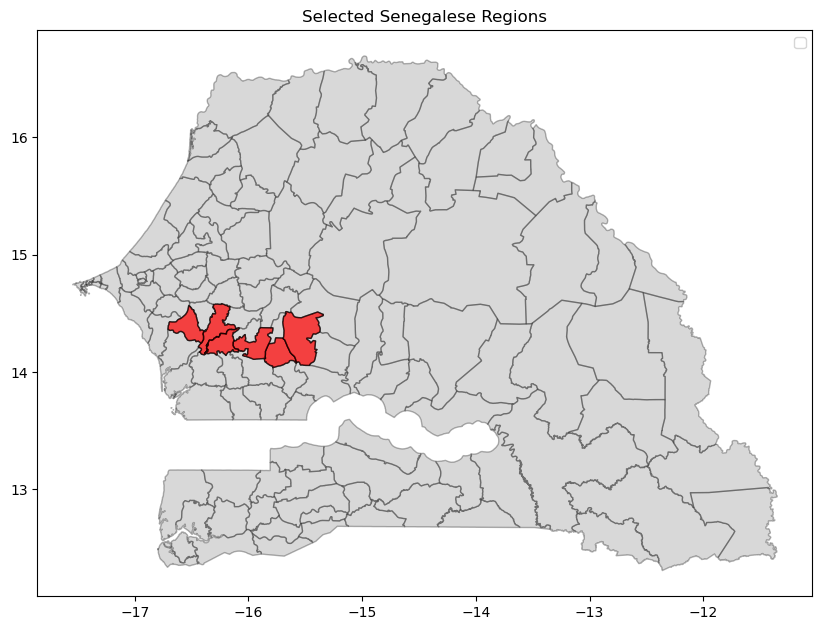

In [12]:
print(gdf_dict['senegal']['ADMIN_NAME'].tolist())
senegal_gdf = gdf_dict.get("senegal")  
selected_regions = ["Gniby, Kaffrine", "Tattaguine, Fatick", 'Mbadakhoune, Fass','Keur Mbouki, Birkelane','Ngothie, Gandiaye, Sibassor','Ndiob, Diakhao']
sen_gdf = senegal_gdf[senegal_gdf["ADMIN_NAME"].isin(selected_regions)]        
fig, ax = plt.subplots(figsize=(10, 8))
senegal_gdf.plot(ax=ax, alpha=0.3, edgecolor='black', color='gray', label="All regions")
sen_gdf.plot(ax=ax, alpha=0.7, edgecolor='black', color='red', label="Selected regions")
        
ax.set_title("Selected Senegalese Regions")
plt.legend()
plt.show() 


In [37]:
eth_gdf = eth_gdf.to_crs("EPSG:4326")
sen_gdf = sen_gdf.to_crs("EPSG:4326")
print(eth_gdf.crs)
print(sen_gdf.crs)

eth_eemap = geemap.geopandas_to_ee(eth_gdf)
sen_eemap = geemap.geopandas_to_ee(sen_gdf)

EPSG:4326
EPSG:4326


In [56]:
# Reproject to a metric CRS (EPSG:3857)
eth_gdf_metric = eth_gdf.to_crs("EPSG:3857")
sen_gdf_metric = sen_gdf.to_crs("EPSG:3857")

# Calculate area in square meters
eth_gdf_metric['area_m2'] = (eth_gdf_metric.geometry.area)/(10**6)
sen_gdf_metric['area_m2'] = (sen_gdf_metric.geometry.area)/(10**6)

# Print out a summary for Ethiopia districts
print(eth_gdf_metric[['ADMIN_NAME', 'area_m2']])
print(sen_gdf_metric[['ADMIN_NAME', 'area_m2']])


         ADMIN_NAME      area_m2
15     Degua Temben  1100.266928
20             Erob   869.214158
21   Saesi Tsadamba  1239.782174
22    Ganta Afeshum   574.470183
23           Hawzen   909.477726
24     Kilte Awlalo  1071.507040
28    Seharti Samre  1824.774867
29          Enderta  1470.579354
30  Hintalo Wajirat  2051.715879
                     ADMIN_NAME      area_m2
19               Ndiob, Diakhao   677.449023
21           Tattaguine, Fatick   604.359845
27       Keur Mbouki, Birkelane   561.649277
29              Gniby, Kaffrine  1367.819511
36            Mbadakhoune, Fass   642.743726
40  Ngothie, Gandiaye, Sibassor   466.706985


In [41]:
start_date = ee.Date('2014-01-01')
end_date = ee.Date('2024-01-01')  # non-inclusive end; covers 2023.
# Calculate number of months:
n_months = end_date.difference(start_date, 'month').round().int()

# Create a server-side list of monthly start dates.
# We map over a sequence from 0 to n_months - 1.
month_list = ee.List.sequence(0, n_months.subtract(1)).map(lambda m: start_date.advance(ee.Number(m), 'month'))

In [45]:
# 3. Define a function that, for a given district feature, creates one new feature per month
# with the monthly mean radiance.
# -------------------------------
def compute_monthly_mean(feature):
    # For each month (represented as an ee.Date), compute the mean radiance.
    def compute_for_month(m):
        # m is a server-side number; convert it to a date.
        date = ee.Date(m)
        # Define the month’s time window.
        start = date
        end = date.advance(1, 'month')
        # Filter the VIIRS ImageCollection for that month.
        collection = ee.ImageCollection("NOAA/VIIRS/001/VNP46A1") \
                        .filterDate(start, end)
        # Compute a mean composite for that month.
        monthly_composite = collection.mean().select('DNB_At_Sensor_Radiance_500m')
        # Reduce over the district geometry.
        mean_dict = monthly_composite.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=feature.geometry(),
            scale=1000,          # adjust scale as appropriate (meters per pixel)
            bestEffort=True
        )
        # Get the mean radiance.
        mean_rad = mean_dict.get('DNB_At_Sensor_Radiance_500m')
        # Return a new feature. We copy the original district properties and add
        # properties for the month, year, and computed mean radiance.
        return feature.copyProperties(feature).set({
            'date': date.format('YYYY-MM-dd'),
            'year': date.get('year'),
            'month': date.get('month'),
            'mean_rad': mean_rad
        })
    # Map the above function over the list of monthly dates.
    print(month_list.getInfo())
    monthly_features = ee.FeatureCollection(month_list.map(compute_for_month))
    return monthly_features

In [57]:
# This will create, for each district, a set of monthly features. Then we flatten all features into one collection.
eth_monthly_district = eth_eemap.map(compute_monthly_mean).flatten()
sen_monthly_district = sen_eemap.map(compute_monthly_mean).flatten()

[{'type': 'Date', 'value': 1388534400000}, {'type': 'Date', 'value': 1391212800000}, {'type': 'Date', 'value': 1393632000000}, {'type': 'Date', 'value': 1396310400000}, {'type': 'Date', 'value': 1398902400000}, {'type': 'Date', 'value': 1401580800000}, {'type': 'Date', 'value': 1404172800000}, {'type': 'Date', 'value': 1406851200000}, {'type': 'Date', 'value': 1409529600000}, {'type': 'Date', 'value': 1412121600000}, {'type': 'Date', 'value': 1414800000000}, {'type': 'Date', 'value': 1417392000000}, {'type': 'Date', 'value': 1420070400000}, {'type': 'Date', 'value': 1422748800000}, {'type': 'Date', 'value': 1425168000000}, {'type': 'Date', 'value': 1427846400000}, {'type': 'Date', 'value': 1430438400000}, {'type': 'Date', 'value': 1433116800000}, {'type': 'Date', 'value': 1435708800000}, {'type': 'Date', 'value': 1438387200000}, {'type': 'Date', 'value': 1441065600000}, {'type': 'Date', 'value': 1443657600000}, {'type': 'Date', 'value': 1446336000000}, {'type': 'Date', 'value': 1448928

In [65]:
# Define a function that computes the monthly mean EVI for a given district feature.
def compute_monthly_ndvi(feature):
    def compute_for_month(m):
        # Convert the server-side number to an EE Date.
        date = ee.Date(m)
        start = date
        end = date.advance(1, 'month')
        # Filter the MODIS NDVI collection for the month.
        collection = ee.ImageCollection("MODIS/061/MOD13Q1").filterDate(start, end)
        # Compute a mean composite for that month and select the 'EVI' band.
        monthly_composite = collection.mean().select('EVI')
        # Reduce over the district geometry.
        mean_dict = monthly_composite.reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=feature.geometry(),
            scale=250,  # MODIS MOD13Q1 has a nominal resolution of 250 meters.
            bestEffort=True
        )
        mean_evi = mean_dict.get('EVI')
        # Return a new feature with the original district properties and additional monthly info.
        return feature.copyProperties(feature).set({
            'date': date.format('YYYY-MM-dd'),
            'year': date.get('year'),
            'month': date.get('month'),
            'mean_evi': mean_evi
        })
    # Map the monthly function over the list of months.
    monthly_features = ee.FeatureCollection(month_list.map(compute_for_month))
    return monthly_features


In [67]:

# Apply the function to each district. This will generate, for each district,
# a collection of monthly features. Then we flatten the nested collections.
eth_monthly_ndvi = eth_eemap.map(compute_monthly_ndvi).flatten()
sen_monthly_ndvi = sen_eemap.map(compute_monthly_ndvi).flatten()


# Inspect the output by printing size and one feature.
print("Panel data size Ethiopia:", eth_monthly_ndvi.size().getInfo())
print("First feature:", eth_monthly_ndvi.first().getInfo())


Panel data size Ethiopia: 1080
First feature: {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[39.30219650268561, 13.793684959411609], [39.29651260375969, 13.79277038574228], [39.28979873657234, 13.791977882385295], [39.28152084350595, 13.790729522705048], [39.27381515502922, 13.791428565978977], [39.267360687255824, 13.791822433471731], [39.26104354858392, 13.794926643371616], [39.25214385986337, 13.794190406799466], [39.24594879150399, 13.79209518432617], [39.23831176757812, 13.791357040405247], [39.229625701904276, 13.793211936950765], [39.22045135498062, 13.796638488769585], [39.21689605712895, 13.792045593261754], [39.21916580200197, 13.78678035736088], [39.22182846069346, 13.779819488525323], [39.21966934204106, 13.77416419982914], [39.21464920043952, 13.769764900207479], [39.21006393432633, 13.764554023742757], [39.20388793945321, 13.763366699218723], [39.197479248046854, 13.763586997985863], [39.1897239685059, 13.761054039001436], [39.191272735595675, 13.75

In [69]:

# (Optional) Export the panel data as a CSV to Google Drive.
task = ee.batch.Export.table.toDrive(
    collection=sen_monthly_ndvi,
    description='SEN_Monthly_MODIS_NDVI_2014_2024',
    folder='EarthEngineExports',
    fileFormat='CSV'
)
task.start()

print("Export task started. Check your Google Drive (folder 'EarthEngineExports') for the CSV file.")

Export task started. Check your Google Drive (folder 'EarthEngineExports') for the CSV file.
